In [1]:
# =======================================================
# Exploración inicial de Accidentes de Tránsito en Costa Rica
# =======================================================

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# ---------------------------------------------
# 1) Función para encontrar el CSV procesado
# ---------------------------------------------
def encontrar_csv(nombre_archivo):
    """
    Busca el CSV en varias carpetas posibles (data/processed o src/data/processed).
    """
    base_paths = [
        Path("../data/processed"),
        Path("../src/data/processed"),
        Path("data/processed"),
        Path("src/data/processed")
    ]

    for base in base_paths:
        posible = base / nombre_archivo
        if posible.exists():
            print(f"✅ CSV encontrado en: {posible}")
            return posible

    raise FileNotFoundError("❌ No se encontró el archivo procesado. Ejecuta main.py primero.")

# ---------------------------------------------
# 2) Cargar datos
# ---------------------------------------------
DATA_PATH = encontrar_csv("accidentes_clima_2023.csv")
df = pd.read_csv(DATA_PATH, parse_dates=["fecha"])

print(f"✅ Datos cargados: {df.shape[0]} registros y {df.shape[1]} columnas")
df.head()


✅ CSV encontrado en: ..\src\data\processed\accidentes_clima_2023.csv
✅ Datos cargados: 94435 registros y 10 columnas


,fecha,hora,provincia,tipo_via,clase de accidente,tipo de accidente,estado del tiempo,ruta,kilómetro,precip_acum
0,2017-10-01,20,San José,Nacional,Solo heridos leves,Colisión con motocicleta,Lluvia,2,141,NaN
1,2017-01-03,6,Heredia,Cantonal,Solo heridos leves,Colisión con motocicleta,Buen tiempo,Cantonal,Cantonal,NaN
2,2017-01-03,16,Heredia,Nacional,Solo heridos leves,Atropello a persona,Buen tiempo,116,4,NaN
3,2017-01-05,18,Heredia,Nacional,Solo heridos leves,Colisión con motocicleta,Buen tiempo,106,4,NaN
4,2017-01-05,20,Heredia,Nacional,Solo heridos leves,Colisión con motocicleta,Buen tiempo,116,2,NaN


# Exploración inicial de accidentes de tránsito en Costa Rica

Cargamos el dataset procesado y realizamos un EDA básico.

In [2]:

# ---------------------------------------------
# 3) Resumen general
# ---------------------------------------------
print("📊 Resumen de datos:")
display(df.describe(include="all"))

print("\n📌 Valores nulos por columna:")
print(df.isnull().sum())


📊 Resumen de datos:


,fecha,hora,provincia,tipo_via,clase de accidente,tipo de accidente,estado del tiempo,ruta,kilómetro,precip_acum
count,94435,94435.000000,94435,94435,94435,94435,94435,94435,94435,15199.000000
unique,NaN,NaN,7,4,2,12,5,329,349,NaN
top,NaN,NaN,San José,Nacional,Solo heridos leves,Colisión con motocicleta,Buen tiempo,Cantonal,Cantonal,NaN
freq,NaN,NaN,33616,60866,80347,37921,80583,32425,32425,NaN
mean,2020-07-05 12:25:16.471647232,13.455086,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.479459
min,2017-01-01 00:00:00,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
25%,2018-10-01 00:00:00,9.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
50%,2020-07-04 00:00:00,14.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.300000
75%,2022-05-06 00:00:00,18.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.500000
max,2023-12-07 00:00:00,23.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,58.900000



📌 Valores nulos por columna:
fecha                     0
hora                      0
provincia                 0
tipo_via                  0
clase de accidente        0
tipo de accidente         0
estado del tiempo         0
ruta                      0
kilómetro                 0
precip_acum           79236
dtype: int64


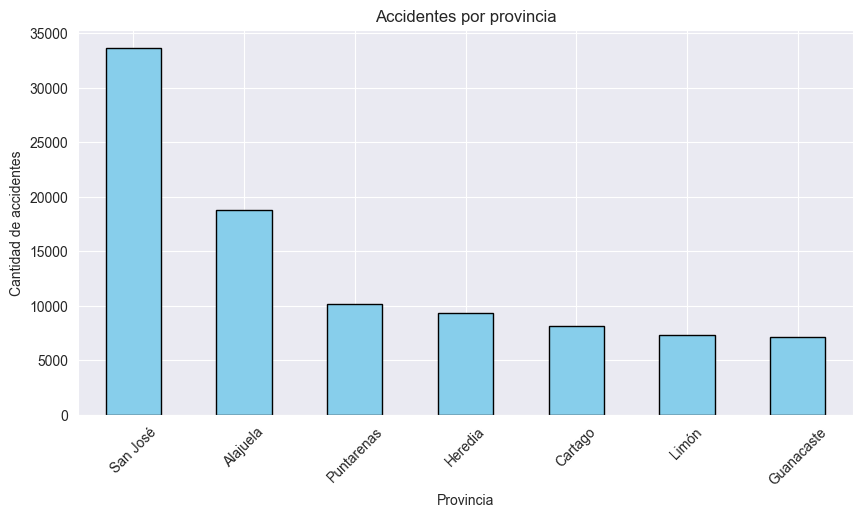

In [3]:
# ---------------------------------------------
# 4) Accidentes por provincia
# ---------------------------------------------
plt.figure(figsize=(10,5))
df["provincia"].value_counts().plot(kind="bar", color="skyblue", edgecolor="black")
plt.title("Accidentes por provincia")
plt.ylabel("Cantidad de accidentes")
plt.xlabel("Provincia")
plt.xticks(rotation=45)
plt.show()


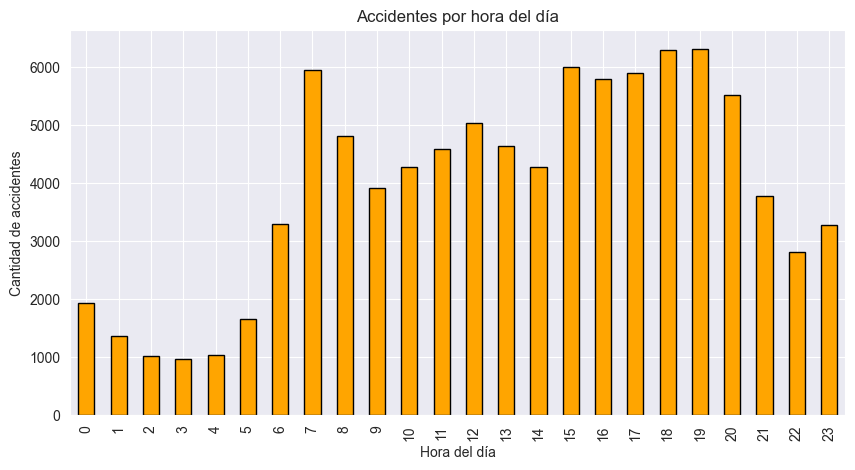

In [4]:
# ---------------------------------------------
# 5) Accidentes por hora
# ---------------------------------------------
plt.figure(figsize=(10,5))
df["hora"].value_counts().sort_index().plot(kind="bar", color="orange", edgecolor="black")
plt.title("Accidentes por hora del día")
plt.ylabel("Cantidad de accidentes")
plt.xlabel("Hora del día")
plt.show()


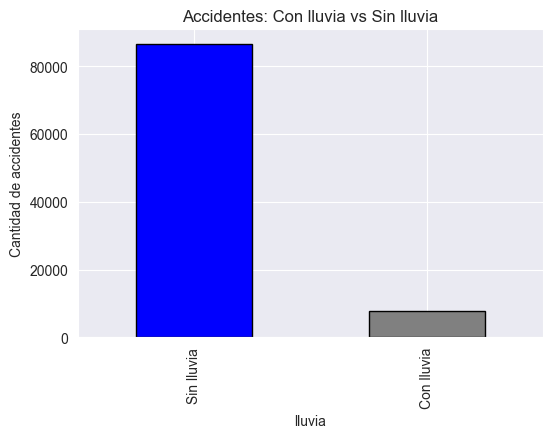

In [5]:
# ---------------------------------------------
# 6) Comparación: lluvia vs sin lluvia
# ---------------------------------------------
df["lluvia"] = df["precip_acum"].fillna(0).apply(lambda x: "Con lluvia" if x > 1 else "Sin lluvia")

plt.figure(figsize=(6,4))
df["lluvia"].value_counts().plot(kind="bar", color=["blue","gray"], edgecolor="black")
plt.title("Accidentes: Con lluvia vs Sin lluvia")
plt.ylabel("Cantidad de accidentes")
plt.show()
